# Random number generation

## Bogumił Kamiński

In [1]:
using CSV
using DataFrames
using Distributions
using FreqTables
using Plots
using ProgressMeter
using Random
using StableRNGs
using StatsBase
using Statistics

## In-built functionality

### Refrence: https://docs.julialang.org/en/v1/stdlib/Random/

Warning: the random numbers generated by default random number generator may change (and did change in the past) across Julia versions

Key functions:
* `seed!`
* `rand` / `rand!` (general sampling, by default from [0, 1) interval)
* `randn` / `randn!` (standard normal)
* `randexp` / `randexp!` (exponential)
* `randsubseq` / `randsubseq!` (random subsequence)
* `randperm` / `randperm!` (random permutation)
* `shuffle` / `shuffle!` (random shuffling of input)
* `sample` / `sample!` (advanced sampling; from StatsBase.jl)
* `Weights` (for weighted sampling; from StatsBase.jl)

Notes:
* The `!` versions of the functions store the result in the passed container (useful to avoid allocations)
* All functions allow to specify the random number generator to use

Generators:
* default (currently `Xoshiro`)
* `Xoshiro`
* `MersenneTwister`
* `RandomDevice`: randomness taken from the device

### Examples

Sample a single number from [0, 1) interval:

In [2]:
rand()

0.8287331815481547

Sample 10 numbers from [0, 1) interval:

In [3]:
rand(10)

10-element Vector{Float64}:
 0.1207358822014113
 0.8245415638158708
 0.8395319288551157
 0.289856549087119
 0.6653462911077601
 0.11663167721271273
 0.463044704294137
 0.4461302538147923
 0.08701395566086167
 0.8515397931871918

Sample one and 10 numbers from Poisson(2) distribution:

In [4]:
pd = Poisson(2) # from Distributions package

Poisson{Float64}(λ=2.0)

In [5]:
rand(pd)

1

In [6]:
rand(pd, 10)

10-element Vector{Int64}:
 4
 1
 2
 3
 0
 3
 0
 1
 2
 3

Sample a single value from a collection:

In [7]:
rand([1, 3, 5])

3

Sample 10 values from a collection, with replacement:

In [8]:
rand([1, 3, 5], 10)

10-element Vector{Int64}:
 3
 1
 1
 5
 5
 3
 1
 3
 5
 1

Sample 10 values from a collection, without replacement:

In [9]:
sample([1, 3, 5], 10, replace=false)

LoadError: Cannot draw more samples without replacement.

In [10]:
sample([1, 3, 5], 2, replace=false)

2-element Vector{Int64}:
 1
 5

Weighted sample, with replacement:

In [11]:
sample([1, 3, 5], Weights([1, 2, 3]), 2)

2-element Vector{Int64}:
 3
 5

Exercise: check that weights are indeed respected:

In [12]:
proptable(sample([1, 3, 5], Weights([1, 2, 3]), 10^6))

3-element Named Vector{Float64}
Dim1  │ 
──────┼─────────
1     │ 0.166591
3     │ 0.333004
5     │ 0.500405

In [13]:
countmap(sample([1, 3, 5], Weights([1, 2, 3]), 10^6))

Dict{Int64, Int64} with 3 entries:
  5 => 499521
  3 => 333972
  1 => 166507

Exercise 2 (advanced): check the same on a much larger sample

General method

In [14]:
tmp = Vector{Int}(undef, 100_000)
a = [1, 3, 5]
wts = Weights([1, 2, 3])

res = @showprogress map(i -> countmap(sample!(a, wts, tmp)), 1:10_000)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:30


10000-element Vector{Dict{Int64, Int64}}:
 Dict(5 => 49972, 3 => 33369, 1 => 16659)
 Dict(5 => 50300, 3 => 33359, 1 => 16341)
 Dict(5 => 49874, 3 => 33487, 1 => 16639)
 Dict(5 => 49890, 3 => 33259, 1 => 16851)
 Dict(5 => 50093, 3 => 33577, 1 => 16330)
 Dict(5 => 50190, 3 => 33132, 1 => 16678)
 Dict(5 => 49784, 3 => 33553, 1 => 16663)
 Dict(5 => 49977, 3 => 33358, 1 => 16665)
 Dict(5 => 50202, 3 => 33170, 1 => 16628)
 Dict(5 => 49972, 3 => 33357, 1 => 16671)
 Dict(5 => 49840, 3 => 33478, 1 => 16682)
 Dict(5 => 49914, 3 => 33375, 1 => 16711)
 Dict(5 => 50216, 3 => 33140, 1 => 16644)
 ⋮
 Dict(5 => 49891, 3 => 33276, 1 => 16833)
 Dict(5 => 49725, 3 => 33525, 1 => 16750)
 Dict(5 => 50145, 3 => 33401, 1 => 16454)
 Dict(5 => 50024, 3 => 33209, 1 => 16767)
 Dict(5 => 49793, 3 => 33420, 1 => 16787)
 Dict(5 => 49836, 3 => 33330, 1 => 16834)
 Dict(5 => 49735, 3 => 33600, 1 => 16665)
 Dict(5 => 49981, 3 => 33220, 1 => 16799)
 Dict(5 => 50127, 3 => 33205, 1 => 16668)
 Dict(5 => 49904, 3 => 33345, 1

Turning the resutls into a data frame:

In [15]:
res[1]

Dict{Int64, Int64} with 3 entries:
  5 => 49972
  3 => 33369
  1 => 16659

In [16]:
keys(res[1])

KeySet for a Dict{Int64, Int64} with 3 entries. Keys:
  5
  3
  1

In [17]:
collect(keys(res[1]))

3-element Vector{Int64}:
 5
 3
 1

In [18]:
DataFrame(keys=collect(keys(res[1])), values=collect(values(res[1])))

Row,keys,values
,Int64,Int64
1,5,49972
2,3,33369
3,1,16659


In [19]:
map(x -> DataFrame(keys=collect(keys(x)), values=collect(values(x))), res)

10000-element Vector{DataFrame}:
 3×2 DataFrame
 Row │ keys   values 
     │ Int64  Int64  
─────┼───────────────
   1 │     5   49972
   2 │     3   33369
   3 │     1   16659
 3×2 DataFrame
 Row │ keys   values 
     │ Int64  Int64  
─────┼───────────────
   1 │     5   50300
   2 │     3   33359
   3 │     1   16341
 3×2 DataFrame
 Row │ keys   values 
     │ Int64  Int64  
─────┼───────────────
   1 │     5   49874
   2 │     3   33487
   3 │     1   16639
 3×2 DataFrame
 Row │ keys   values 
     │ Int64  Int64  
─────┼───────────────
   1 │     5   49890
   2 │     3   33259
   3 │     1   16851
 3×2 DataFrame
 Row │ keys   values 
     │ Int64  Int64  
─────┼───────────────
   1 │     5   50093
   2 │     3   33577
   3 │     1   16330
 3×2 DataFrame
 Row │ keys   values 
     │ Int64  Int64  
─────┼───────────────
   1 │     5   50190
   2 │     3   33132
   3 │     1   16678
 3×2 DataFrame
 Row │ keys   values 
     │ Int64  Int64  
─────┼───────────────
   1 │     5   49784
 

In [20]:
res_df = reduce(vcat, map(x -> DataFrame(keys=collect(keys(x)), values=collect(values(x))), res); source="id")

Row,keys,values,id
,Int64,Int64,Int64
1,5,49972,1
2,3,33369,1
3,1,16659,1
4,5,50300,2
5,3,33359,2
6,1,16341,2
7,5,49874,3
8,3,33487,3
9,1,16639,3


In [21]:
combine(groupby(res_df, :keys, sort=true), :values => sum)

Row,keys,values_sum
,Int64,Int64
1,1,166655161
2,3,333334283
3,5,500010556


Specific method for counting:

In [22]:
res2 = Dict{Int, Int}()
@showprogress for _ in 1:10_000
    addcounts!(res2, sample!(a, wts, tmp))
end
res2

Progress: 100%|█████████████████████████████████████████| Time: 0:00:28


Dict{Int64, Int64} with 3 entries:
  5 => 500017921
  3 => 333319752
  1 => 166662327

Sample 10000 observations from standard normal distribution:

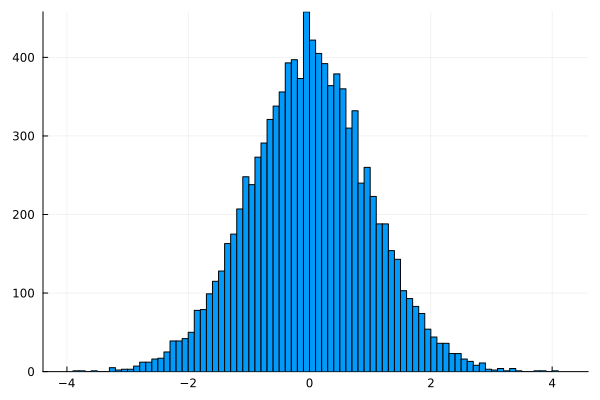

In [23]:
histogram(randn(10_000); nbins=100, label=nothing)

Sample 10000 observations from exponential distribution with expected value equal to 1:

In [24]:
x = randexp(10_000)

10000-element Vector{Float64}:
 2.412394821076375
 0.3115430335666051
 0.05281565984931169
 1.0930847233227985
 6.974437960352996
 1.2828488512862943
 0.9537416374070754
 0.3364617568072983
 1.01471788642182
 1.551984204555011
 0.6541370027024406
 1.4313896074781731
 0.20165227547451994
 ⋮
 0.7673982250307984
 0.09401440768113686
 2.1805484432284596
 4.516050598638961
 2.1103910081818236
 0.2872675765302713
 0.5620277063726177
 1.0089715464937818
 0.016358398026533806
 0.15716603976414195
 0.1441445770803541
 1.6229610721619134

In [25]:
mean(x), std(x)

(1.0159920558729292, 1.0102488268805911)

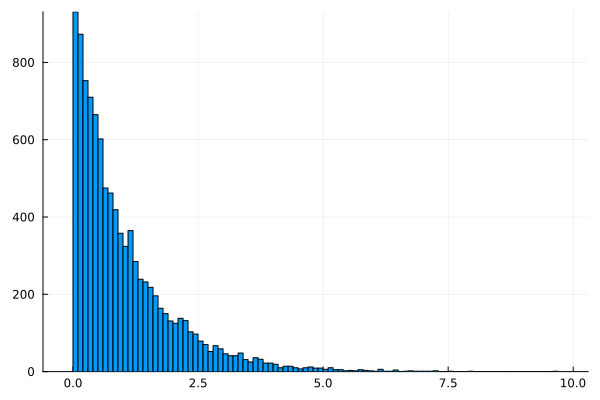

In [26]:
histogram(x; nbins=100, label=nothing)

Generate a random permutation of length 10

In [27]:
randperm(10)

10-element Vector{Int64}:
  6
  4
  9
  8
  7
  5
  3
  1
  2
 10

Randomly shuffle a vector:

In [28]:
v = 'a':'z'

'a':1:'z'

In [29]:
collect(v)

26-element Vector{Char}:
 'a': ASCII/Unicode U+0061 (category Ll: Letter, lowercase)
 'b': ASCII/Unicode U+0062 (category Ll: Letter, lowercase)
 'c': ASCII/Unicode U+0063 (category Ll: Letter, lowercase)
 'd': ASCII/Unicode U+0064 (category Ll: Letter, lowercase)
 'e': ASCII/Unicode U+0065 (category Ll: Letter, lowercase)
 'f': ASCII/Unicode U+0066 (category Ll: Letter, lowercase)
 'g': ASCII/Unicode U+0067 (category Ll: Letter, lowercase)
 'h': ASCII/Unicode U+0068 (category Ll: Letter, lowercase)
 'i': ASCII/Unicode U+0069 (category Ll: Letter, lowercase)
 'j': ASCII/Unicode U+006A (category Ll: Letter, lowercase)
 'k': ASCII/Unicode U+006B (category Ll: Letter, lowercase)
 'l': ASCII/Unicode U+006C (category Ll: Letter, lowercase)
 'm': ASCII/Unicode U+006D (category Ll: Letter, lowercase)
 'n': ASCII/Unicode U+006E (category Ll: Letter, lowercase)
 'o': ASCII/Unicode U+006F (category Ll: Letter, lowercase)
 'p': ASCII/Unicode U+0070 (category Ll: Letter, lowercase)
 'q': ASCII/Uni

In [30]:
shuffle(v)

26-element Vector{Char}:
 't': ASCII/Unicode U+0074 (category Ll: Letter, lowercase)
 'j': ASCII/Unicode U+006A (category Ll: Letter, lowercase)
 'c': ASCII/Unicode U+0063 (category Ll: Letter, lowercase)
 'v': ASCII/Unicode U+0076 (category Ll: Letter, lowercase)
 'n': ASCII/Unicode U+006E (category Ll: Letter, lowercase)
 'i': ASCII/Unicode U+0069 (category Ll: Letter, lowercase)
 'o': ASCII/Unicode U+006F (category Ll: Letter, lowercase)
 'k': ASCII/Unicode U+006B (category Ll: Letter, lowercase)
 'h': ASCII/Unicode U+0068 (category Ll: Letter, lowercase)
 'p': ASCII/Unicode U+0070 (category Ll: Letter, lowercase)
 'w': ASCII/Unicode U+0077 (category Ll: Letter, lowercase)
 'l': ASCII/Unicode U+006C (category Ll: Letter, lowercase)
 'u': ASCII/Unicode U+0075 (category Ll: Letter, lowercase)
 'g': ASCII/Unicode U+0067 (category Ll: Letter, lowercase)
 'r': ASCII/Unicode U+0072 (category Ll: Letter, lowercase)
 'q': ASCII/Unicode U+0071 (category Ll: Letter, lowercase)
 'x': ASCII/Uni

Randomly shuffle rows of a data frame:

In [31]:
df_v = DataFrame(; v)

Row,v
,Char
1,a
2,b
3,c
4,d
5,e
6,f
7,g
8,h
9,i


In [32]:
shuffle(df_v)

Row,v
,Char
1,l
2,k
3,s
4,m
5,i
6,x
7,d
8,e
9,c


Sample data 100_000 points from a 3-dimensional normal distribution with a given mean vector and covariance matrix:

In [33]:
m = [1.0, 2.0, 3.0]

3-element Vector{Float64}:
 1.0
 2.0
 3.0

In [34]:
v = [1.0 0.5 0.3
     0.5 2.0 0.4
     0.3 0.4 3.0]

3×3 Matrix{Float64}:
 1.0  0.5  0.3
 0.5  2.0  0.4
 0.3  0.4  3.0

In [35]:
mvn = MultivariateNormal(m, v)

FullNormal(
dim: 3
μ: [1.0, 2.0, 3.0]
Σ: [1.0 0.5 0.3; 0.5 2.0 0.4; 0.3 0.4 3.0]
)


In [36]:
mat = rand(mvn, 100_000)

3×100000 Matrix{Float64}:
 1.82965   1.58007    1.13249  0.638036  …  1.06598  0.285238  0.617969
 2.64363  -0.0550941  2.76813  0.490974     2.33021  2.04469   1.49426
 3.82112   1.14112    1.07639  2.94506      1.74017  4.27561   1.88366

In [37]:
mean(mat, dims=2)

3×1 Matrix{Float64}:
 1.004189586328678
 1.9963674505197033
 3.0118942730532448

In [38]:
pairwise(cov, eachrow(mat))

3×3 Matrix{Float64}:
 1.00108   0.499767  0.306286
 0.499767  1.99923   0.412038
 0.306286  0.412038  3.0026

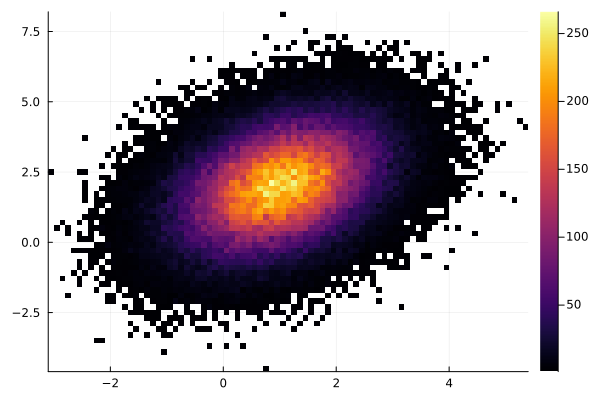

In [39]:
histogram2d(mat[1, :], mat[2, :]; bins=100)

### Ensuring reproducibility

Using global random number generator:

In [40]:
Random.seed!(1234)

TaskLocalRNG()

In [41]:
rand(10)

10-element Vector{Float64}:
 0.5798621201341324
 0.4112941179498505
 0.9721360824554687
 0.014908849285099945
 0.520354993723718
 0.6395615996802734
 0.8396219340580711
 0.967142768915383
 0.13102565622085904
 0.9464532262313834

In [42]:
rand(10)

10-element Vector{Float64}:
 0.749719144596962
 0.5525344667850608
 0.08344008943212289
 0.5257956638691226
 0.8406409194782338
 0.5239478383832243
 0.012846056572255682
 0.40573030892222206
 0.7285427707652774
 0.0027764596470082337

In [43]:
Random.seed!(1234)

TaskLocalRNG()

In [44]:
rand(10)

10-element Vector{Float64}:
 0.5798621201341324
 0.4112941179498505
 0.9721360824554687
 0.014908849285099945
 0.520354993723718
 0.6395615996802734
 0.8396219340580711
 0.967142768915383
 0.13102565622085904
 0.9464532262313834

Using custom random number generator:

In [45]:
rng = MersenneTwister(1234)

MersenneTwister(1234)

In [46]:
rand(rng, 10)

10-element Vector{Float64}:
 0.5908446386657102
 0.7667970365022592
 0.5662374165061859
 0.4600853424625171
 0.7940257103317943
 0.8541465903790502
 0.20058603493384108
 0.2986142783434118
 0.24683718661000897
 0.5796722333690416

In [47]:
rand(rng, 10)

10-element Vector{Float64}:
 0.6488819502093455
 0.010905889635595356
 0.06642303695533736
 0.9567533636029237
 0.646690981531646
 0.11248587118714015
 0.2760209506672211
 0.6516642063795697
 0.05664246860321187
 0.8427136165865521

In [48]:
Random.seed!(rng, 1234)

MersenneTwister(1234)

In [49]:
rand(rng, 10)

10-element Vector{Float64}:
 0.5908446386657102
 0.7667970365022592
 0.5662374165061859
 0.4600853424625171
 0.7940257103317943
 0.8541465903790502
 0.20058603493384108
 0.2986142783434118
 0.24683718661000897
 0.5796722333690416

In [50]:
rng = MersenneTwister(1234)

MersenneTwister(1234)

In [51]:
rand(rng, 10)

10-element Vector{Float64}:
 0.5908446386657102
 0.7667970365022592
 0.5662374165061859
 0.4600853424625171
 0.7940257103317943
 0.8541465903790502
 0.20058603493384108
 0.2986142783434118
 0.24683718661000897
 0.5796722333690416

Using Julia-version independent random number generator from StableRNGs.jl (mostly recommended for testing):

In [52]:
rng = StableRNG(123)

StableRNGs.LehmerRNG(state=0x000000000000000000000000000000f7)

In [53]:
rand(rng, 10)

10-element Vector{Float64}:
 0.18102554215580358
 0.3674899461902501
 0.6690584311411027
 0.04273056581197765
 0.4379909608992427
 0.4832901297478609
 0.7639737291557767
 0.9244830959536434
 0.5150451217580685
 0.49504171746863457

In [54]:
Random.seed!(rng, 123)

StableRNGs.LehmerRNG(state=0x000000000000000000000000000000f7)

In [55]:
rand(rng, 10)

10-element Vector{Float64}:
 0.18102554215580358
 0.3674899461902501
 0.6690584311411027
 0.04273056581197765
 0.4379909608992427
 0.4832901297478609
 0.7639737291557767
 0.9244830959536434
 0.5150451217580685
 0.49504171746863457

## Exercise

Check if indeed under H0 standardized mean of an $n$-element sample has t-distribution with $n$ degrees of freedom

In [56]:
function gen_sample(n, reps, σ)
    tmp = Vector{Float64}(undef, n)
    return map(1:reps) do _
        randn!(tmp)
        tmp .= tmp .* σ
        return sqrt(n) * mean(tmp) / std(tmp)
    end
end

gen_sample (generic function with 1 method)

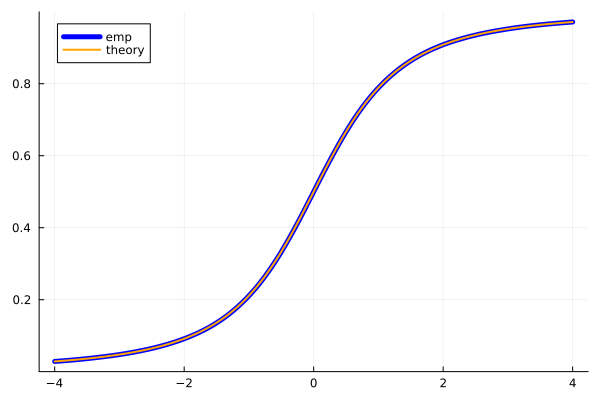

In [57]:
n, reps, σ = 3, 1_000_000, 3
df = DataFrame(x=-4:0.01:4)
df.emp = ecdf(gen_sample(n, reps, σ))(df.x)
df.theory = cdf(TDist(n-1), df.x)
plot(df.x, [df.emp df.theory]; width=[5 2], color=["blue" "orange"], label=["emp" "theory"])